In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#Set-up
os.chdir(os.path.join(os.getcwd(),'..'))
dir_folder=os.path.join(os.getcwd() ,"Tuning")

In [3]:
exp_type=""
metric_list=["Av_Best","Eff_1"]
Parameters=["PR_CROSS","PR_MUT","CROSS","MUT"]
criteria="CritSum"

In [4]:
class_name_list=[name for name in os.listdir(dir_folder) if "Results_rondrit" in name]
#create class_list (as dict)
class_dict={}

for class_name in class_name_list:
    class_dict[class_name] = table_class(class_name,dir_folder,exp_type,metric_list)

In [5]:
df_dict=table_pipeline_basic(class_dict,drop=False)
def_table=pd.concat(df_dict.values())
def_table.head()

,Unnamed: 0,CROSS,MUT,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1,Av_Best_unit,Eff_1_unit,Dataset,CritSum
0,0,cross_mix,mut_mix,0.543321,0.030064,3.460594,3.349954,0.010601,0.945772,0.754637,rondrit016,0.850204
1,1,cross_mix,mut_mix,0.654940,0.199655,3.371813,3.349954,0.010709,1.000000,0.796859,rondrit016,0.898429
2,2,cross_mix,mut_mix,0.882450,0.074979,3.400341,3.349954,0.010829,0.982575,0.843712,rondrit016,0.913143
3,3,cross_mix,mut_mix,0.885156,0.166851,3.378836,3.349954,0.010729,0.995710,0.804996,rondrit016,0.900353
4,4,cross_mix,mut_mix,0.920335,0.157409,3.405976,3.349954,0.010824,0.979133,0.842089,rondrit016,0.910611


In [6]:
rank_table=rank_tables(df_dict,Parameters)

In [7]:
rank_table.head()

,PR_CROSS,PR_MUT,CROSS,MUT,CritSum
391,0.866331,0.054301,cross_sequential_constructive,mut_RSM,3.842973
390,0.993915,0.052859,cross_sequential_constructive,mut_RSM,3.812966
395,0.794182,0.164112,cross_sequential_constructive,mut_RSM,3.811016


In [8]:
table_path=os.path.join(dir_folder,"Ap1_rank_table.csv")
rank_table.to_csv(table_path)

# Plotting (Coarse)

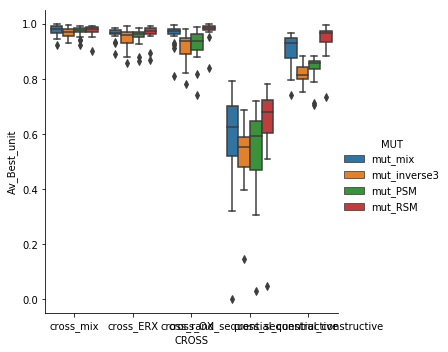

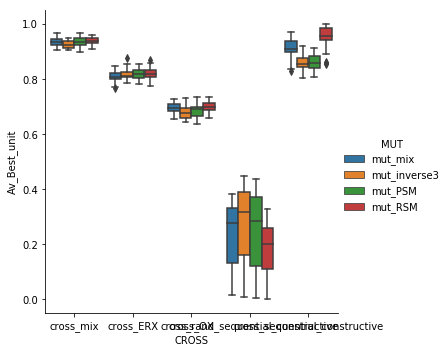

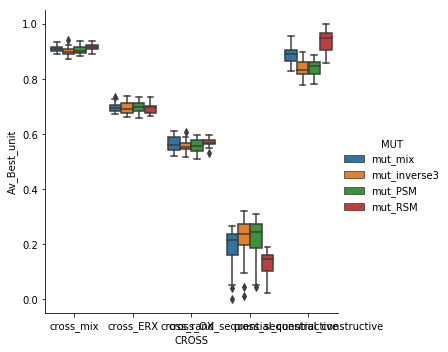

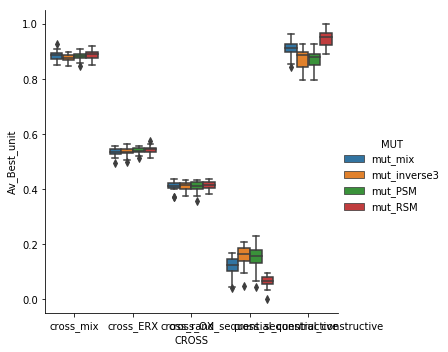

In [9]:
for key in df_dict.keys():
    sns.catplot(x="CROSS", y="Av_Best_unit",hue="MUT",kind="box", data=df_dict[key]);



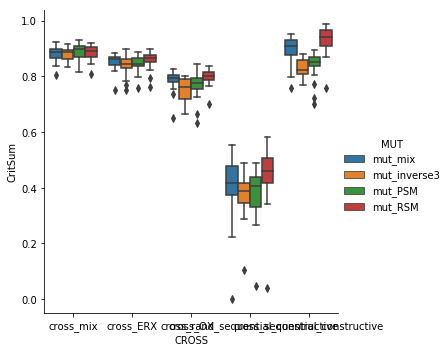

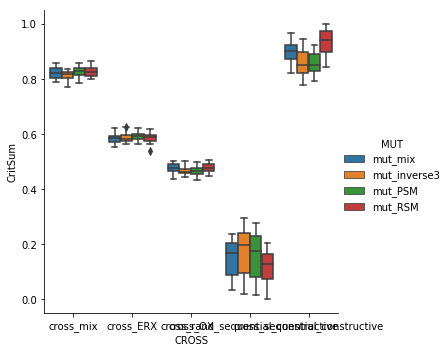

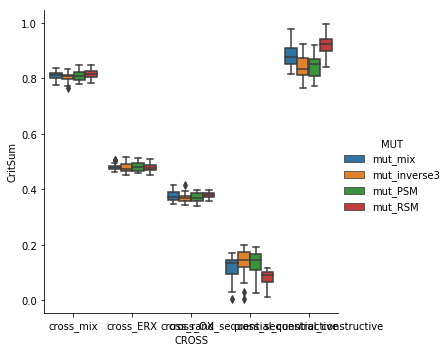

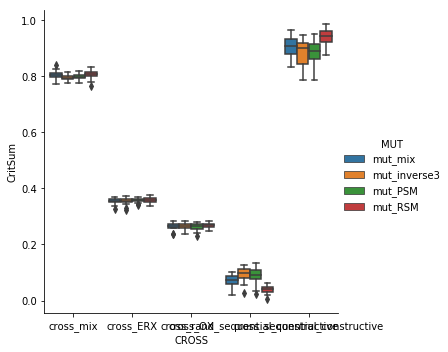

In [10]:
for key in df_dict.keys():
    sns.catplot(x="CROSS", y="CritSum",hue="MUT",kind="box", data=df_dict[key]);


# Pr_Cross/Mut for best Cross,Mut

In [11]:
crop_dict=crop_table_best(df_dict)

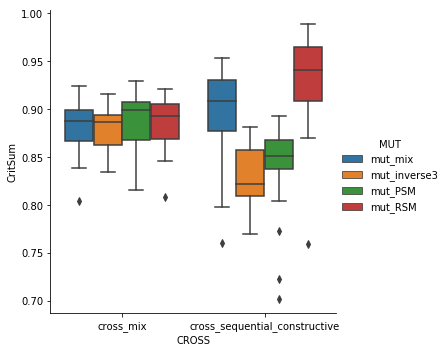

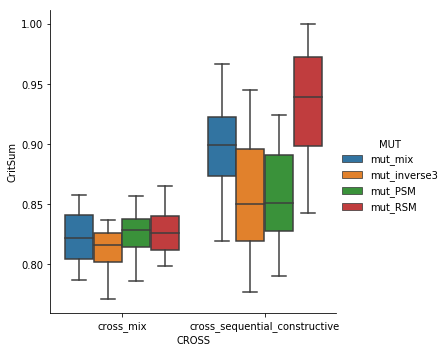

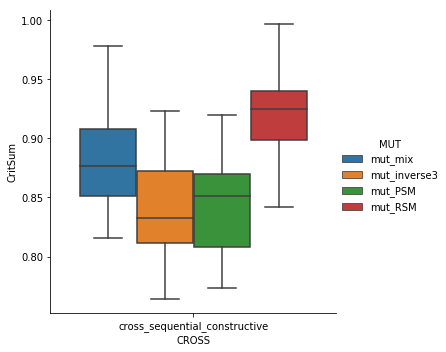

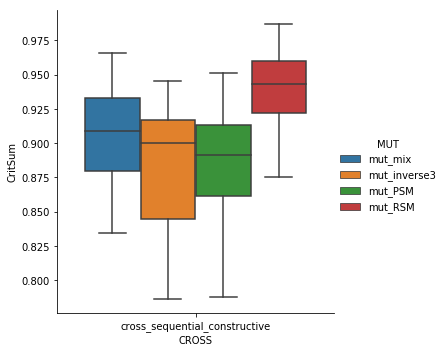

In [12]:
for key in df_dict.keys():
    sns.catplot(x="CROSS", y="CritSum",hue="MUT",kind="box", data=crop_dict[key]);

# Pr Cross Finetune Results

# Coarse  %_Cross in [0.1,1]


In [13]:
exp_type="finetune_"

exp_type="PR_CROSS_"
finetune_class_dict=create_tables(dir_folder,metric_list,exp_type)

In [14]:
df_dict_finetune=table_pipeline_basic(finetune_class_dict,drop=False)
def_table_finetune=pd.concat(df_dict_finetune.values())
def_table_finetune.head()

,CROSS,MUT,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1,Av_Best_unit,Eff_1_unit,Dataset,CritSum
0,cross_sequential_constructive,mut_RSM,0.864864,0.2,3.427602,3.349954,0.011131,0.000000,0.485195,rondrit016,0.242597
1,cross_sequential_constructive,mut_RSM,0.875608,0.2,3.407498,3.349954,0.011068,0.491344,0.239027,rondrit016,0.365185
2,cross_sequential_constructive,mut_RSM,0.889805,0.2,3.404063,3.349954,0.011211,0.575286,0.796150,rondrit016,0.685718
3,cross_sequential_constructive,mut_RSM,0.822601,0.2,3.407827,3.349954,0.011007,0.483309,0.000000,rondrit016,0.241654
4,cross_sequential_constructive,mut_RSM,0.900267,0.2,3.386685,3.349954,0.011219,1.000000,0.829572,rondrit016,0.914786


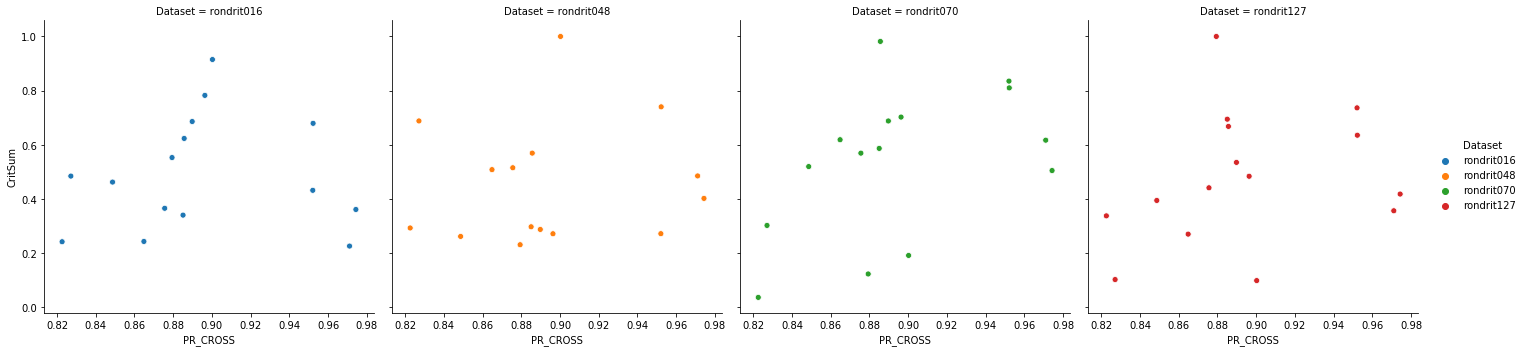

In [15]:
sns.relplot(x="PR_CROSS", y="CritSum", hue="Dataset",col="Dataset" ,data=def_table_finetune);

# FineGrained %_Cross in [0.8,1]


In [16]:
exp_type="PR_CROSS_"
fg_class_dict=create_tables(dir_folder,metric_list,exp_type)

In [17]:
df_dict_fg=table_pipeline_basic(fg_class_dict,drop=False)
def_table_fg=pd.concat(df_dict_fg.values())
def_table_fg.head()

,CROSS,MUT,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1,Av_Best_unit,Eff_1_unit,Dataset,CritSum
0,cross_sequential_constructive,mut_RSM,0.864864,0.2,3.427602,3.349954,0.011131,0.000000,0.485195,rondrit016,0.242597
1,cross_sequential_constructive,mut_RSM,0.875608,0.2,3.407498,3.349954,0.011068,0.491344,0.239027,rondrit016,0.365185
2,cross_sequential_constructive,mut_RSM,0.889805,0.2,3.404063,3.349954,0.011211,0.575286,0.796150,rondrit016,0.685718
3,cross_sequential_constructive,mut_RSM,0.822601,0.2,3.407827,3.349954,0.011007,0.483309,0.000000,rondrit016,0.241654
4,cross_sequential_constructive,mut_RSM,0.900267,0.2,3.386685,3.349954,0.011219,1.000000,0.829572,rondrit016,0.914786


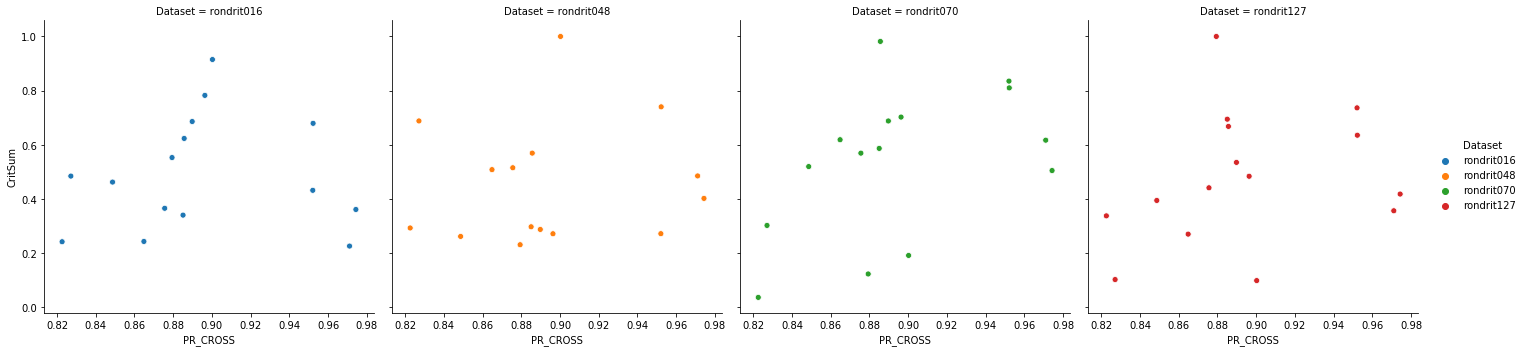

In [18]:
sns.relplot(x="PR_CROSS", y="CritSum", hue="Dataset",col="Dataset" ,data=def_table_fg);